In [2]:
#####
#####
##
## Dear Udacity Teacher!
##
## This is my first project, I have combined region masking and canny edge detection to complete this project
## Please note that I had to install imagemagick
##
## 1. I have made as much annotation as possible
## 2. All images and video are generated in seperate blocks
## 3. There is an extra folder called: "OUTPUT, with the results"
##
## If I had more time I would have been able to smoothen the lines out better...
## But... there is a deadline ;-)
##
## AHHH, the Challenge is in here to, but I failed, time, time, time :-P
##
#####
#####

In [3]:
# Imports needed
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import os
from moviepy.editor import *
from IPython.display import HTML
%matplotlib inline

# Function to determine lines
# Image = image path
# showRegion = "yes" or "no
def determineLines(image, showRegion): 
    
    # Store the real image for later use
    realImage = image
    
    # Set the size of the triangle
    left_bottom = [50, 539]
    right_bottom = [900, 539]
    apex = [488, 298]
    x = [left_bottom[0], right_bottom[0], apex[0], left_bottom[0]]
    y = [left_bottom[1], right_bottom[1], apex[1], left_bottom[1]]
    
    # In the determineLines function you can enable the display of the triangle
    if showRegion == "yes":
        plt.plot(x, y, 'b--', lw=4)

    # set gray tones
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

    # Define a kernel size and apply Gaussian smoothing
    kernel_size = 5
    blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)

    # Define our parameters for Canny and apply
    low_threshold = 50
    high_threshold = 150
    edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

    # Next we'll create a masked edges image using cv2.fillPoly()
    mask = np.zeros_like(edges)   
    ignore_mask_color = 255   

    # This time we are defining a four sided polygon to mask
    imshape = image.shape

    # Set the verticles
    vertices = np.array([[(left_bottom),(apex[0], apex[1]), (apex[0], apex[1]), (right_bottom)]], dtype=np.int32)
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    masked_edges = cv2.bitwise_and(edges, mask)

    # Define the Hough transform parameters
    rho = 1
    theta = np.pi/180
    threshold = 50
    min_line_length = 11
    max_line_gap = 10
    line_image = np.copy(image)*0

    # Run Hough on edge detected image
    lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]), min_line_length, max_line_gap)

    # Iterate over the output "lines" and draw lines on a blank image
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)

    # Create a "color" binary image to combine with line image
    color_edges = np.dstack((edges, edges, edges)) 

    # Draw the lines on the edge image
    lines_edges = cv2.addWeighted(realImage, 0.8, line_image, 1, 0) 
    
    # return result
    return lines_edges

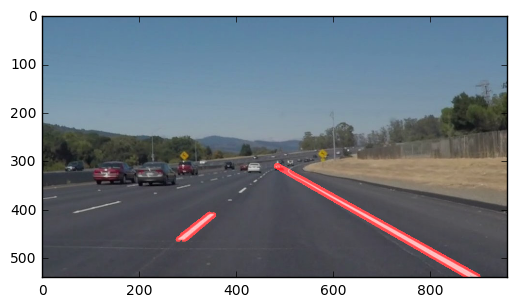

In [3]:
# Process image 1
imageLoad = "test_images/solidWhiteCurve.jpg"
plt.imshow(determineLines((mpimg.imread(imageLoad)).astype('uint8'), "no"))

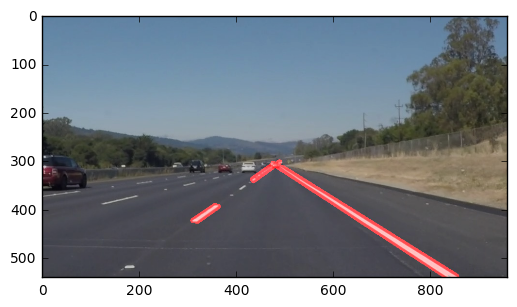

In [4]:
# Process image 2
imageLoad = "test_images/solidWhiteRight.jpg"
plt.imshow(determineLines((mpimg.imread(imageLoad)).astype('uint8'), "no"))

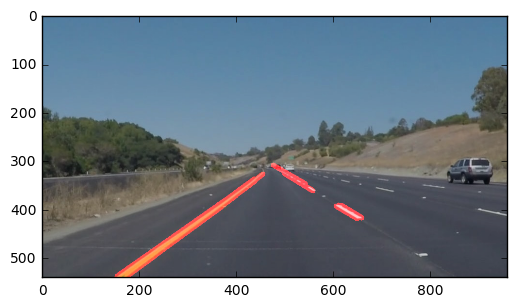

In [5]:
# Process image 3
imageLoad = "test_images/solidYellowCurve.jpg"
plt.imshow(determineLines((mpimg.imread(imageLoad)).astype('uint8'), "no"))

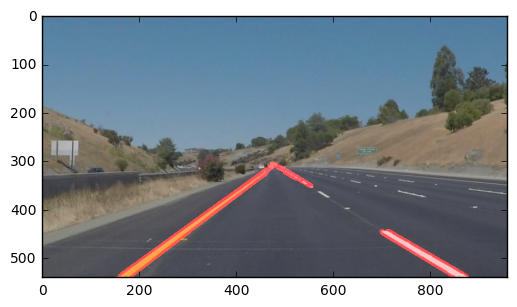

In [6]:
# Process image 4
imageLoad = "test_images/solidYellowCurve2.jpg"
plt.imshow(determineLines((mpimg.imread(imageLoad)).astype('uint8'), "no"))

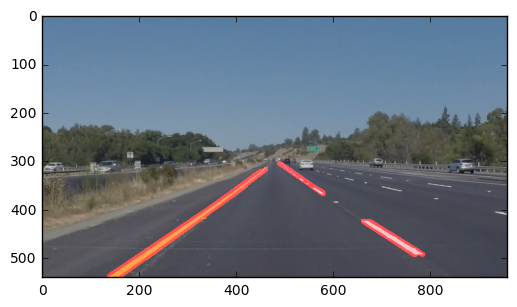

In [7]:
# Process image 5
imageLoad = "test_images/solidYellowLeft.jpg"
plt.imshow(determineLines((mpimg.imread(imageLoad)).astype('uint8'), "no"))

In [4]:
# Create the vid with the same function
def addLinesToImages(image): 
    result = determineLines(image, "no")
    return result

clip = VideoFileClip("solidWhiteRight.mp4")
clipOut = clip.fl_image(addLinesToImages)

%time clipOut.write_videofile('OUTPUT1.mp4', audio=False)

HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format('OUTPUT1.mp4'))

[MoviePy] >>>> Building video OUTPUT1.mp4
[MoviePy] Writing video OUTPUT1.mp4


100%|█████████▉| 221/222 [00:05<00:00, 37.29it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: OUTPUT1.mp4 

CPU times: user 3.81 s, sys: 1.02 s, total: 4.83 s
Wall time: 6.72 s


In [5]:
# Create the vid with the same function
def addLinesToImages(image): 
    result = determineLines(image, "no")
    return result

clip = VideoFileClip("solidYellowLeft.mp4")
clipOut = clip.fl_image(addLinesToImages)

%time clipOut.write_videofile('OUTPUT2.mp4', audio=False)

HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format('OUTPUT2.mp4'))

[MoviePy] >>>> Building video OUTPUT2.mp4
[MoviePy] Writing video OUTPUT2.mp4


100%|█████████▉| 681/682 [00:21<00:00, 31.28it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: OUTPUT2.mp4 

CPU times: user 13.1 s, sys: 3.62 s, total: 16.8 s
Wall time: 22.6 s


In [6]:
# I know why this fails, this is a time restraint though...
def addLinesToImages(image): 
    result = determineLines(image, "no")
    return result

clip = VideoFileClip("challenge.mp4")
clipOut = clip.fl_image(addLinesToImages)

%time clipOut.write_videofile('OUTPUT3.mp4', audio=False)

HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format('OUTPUT3.mp4'))

[MoviePy] >>>> Building video OUTPUT3.mp4
[MoviePy] Writing video OUTPUT3.mp4


100%|██████████| 251/251 [00:19<00:00, 12.94it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: OUTPUT3.mp4 

CPU times: user 10.1 s, sys: 3 s, total: 13.1 s
Wall time: 21.4 s
